<a href="https://colab.research.google.com/github/addy8403/pro1/blob/main/ML_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------


---



# **_1. Dataset Generation_**

We are given a Sample Diabetes Dataset. We use Synthetic Data Vault's data generation library to generate a synthetic dataset. The library will introduce some error in the given data.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#importing real data
import pandas as pd
real_data = pd.read_csv('diabetes.csv')
# real_data = pd.read_excel('diabetes2.xlsx')
real_data.head()

FileNotFoundError: ignored

In [ ]:
#installing syntetic data generation library SVD
%pip install sdv
%pip install urllib3==1.26.7

SDV uses metadata of the dataset to recognise the columns in the dataset.
Metadata is information about the dataset. It contains column names and the data-type of the values. We can generate the metadata of our dataset using SDV's library itself.

In [ ]:
#creating metadata for real data
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

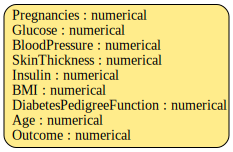

In [ ]:
#visualizing metadata
metadata.visualize()

The synthesizer will fit the real data to SDV's  *'FAST_ML'*  model and  generate the synthetic data.

In [ ]:
#creating synthesizer that will generate synthetic dataset
from sdv.lite import SingleTablePreset
synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [ ]:
#train synthesizer using real data
#restart google colab runtime if this gives error and run all the blocks again
synthesizer.fit(
    data=real_data
)

In [ ]:
#generating synthetic data (maybe run a few times)
synthetic_data = synthesizer.sample(
    num_rows=500
)
synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [ ]:
#saving synthetic data as CSV
synthetic_data.to_csv('generated_data.csv')

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***



``` run_diagnostic() ``` function will show the difference in the actual and synthetic data.


In [ ]:
#This shows how different the synthetic data is from actual dataset
from sdv.evaluation.single_table import run_diagnostic
diagnostic_report = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

ModuleNotFoundError: ignored



``` evaluate_quality() ``` function will score the data based on its covarience with the real data. A higher score implies that real and synthetic data are closely related.


In [ ]:
#scoring the synthetic data using its covarience with real data
from sdv.evaluation.single_table import evaluate_quality
quality_report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 62.49it/s]

Overall Quality Score: 92.34%

Properties:
- Column Shapes: 87.12%
- Column Pair Trends: 97.56%


In [ ]:
#importing graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

The count plot shows how many times does a paticular value occur in the Outcome

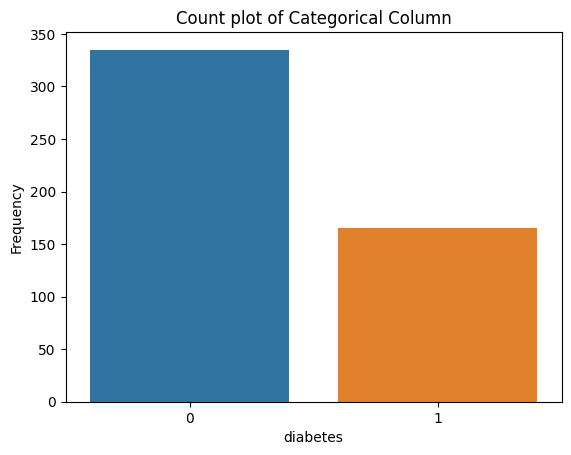

In [ ]:
#Count plot of Categorical Column (change comment)
sns.countplot(data=synthetic_data,x='Outcome')
plt.xlabel('diabetes')
plt.ylabel('Frequency')
plt.title('Count plot of Categorical Column')
plt.show()

Correlation heatmap shows the correlation coefficient between the different features of the dataset.

\begin{align*}
        \text{Correlation Coefficient} = ρ_{xy} = \frac{σ_{xy} }{σ_xσ_y} \\
 σ_{xy} = \text{Covarience of X and Y,} \\
σ_{x} =\text{Varience of X,}\\
σ_{y} = \text{Varience of Y,}
\end{align*}





  If the **correlation coefficient = 1** then X and Y show a **positive linear** realtionship.

  If the **correlation coefficient = -1** then X and Y show a **negative linear** realtionship.
  
  If the **correlation coefficient = 0** then X and Y show **no linear** realtionship.


*For Example :
The heatmap shows a coefficient of 0.4 between Glucose and Outcome suggesting a strong linear relationship between them.*

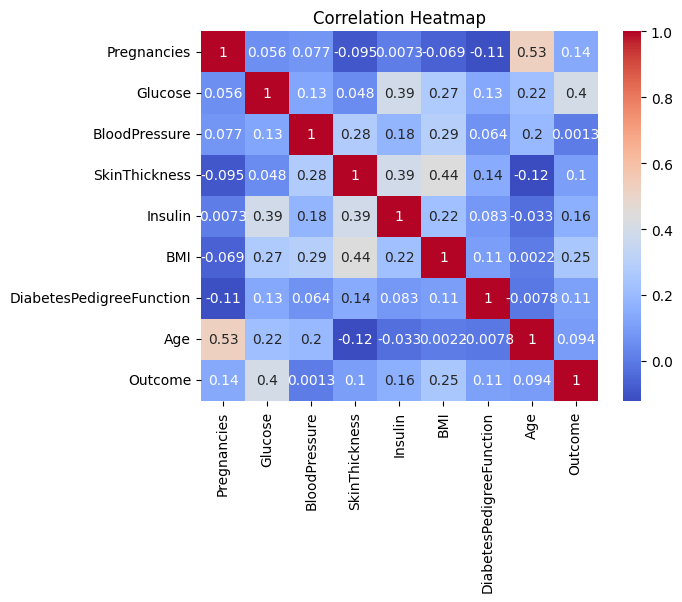

In [ ]:
#correlation between different features of the dataset
correlation_matrix = synthetic_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

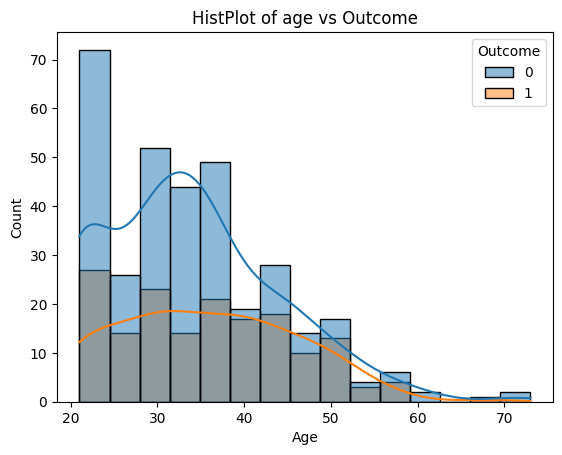

In [ ]:
sns.histplot(data=synthetic_data,x='Age',hue='Outcome',kde=True)
plt.title('HistPlot of age vs Outcome')
plt.show()

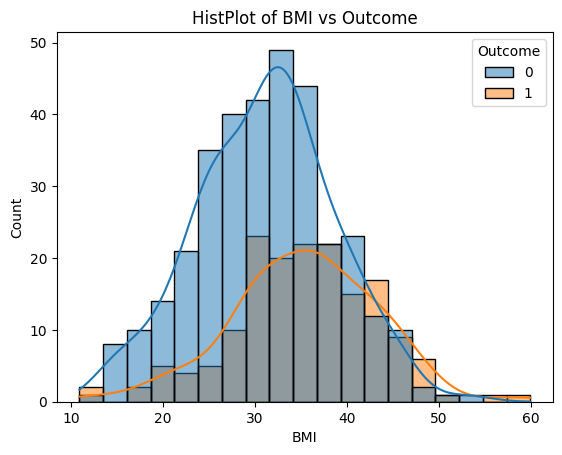

In [ ]:
sns.histplot(data=synthetic_data,x='BMI',hue='Outcome',kde=True)
plt.title('HistPlot of BMI vs Outcome')
plt.show()

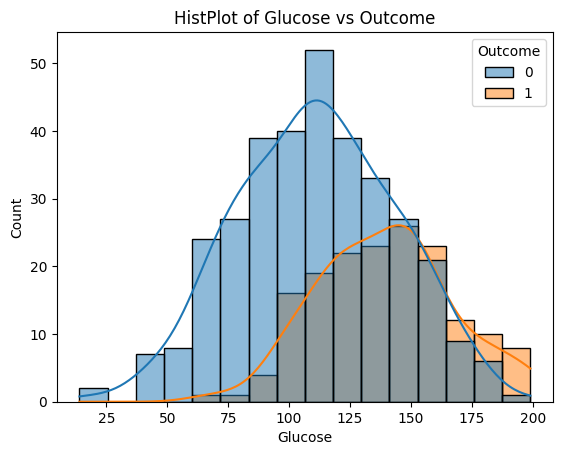

In [ ]:
sns.histplot(data=synthetic_data,x='Glucose',hue='Outcome',kde=True)
plt.title('HistPlot of Glucose vs Outcome')
plt.show()

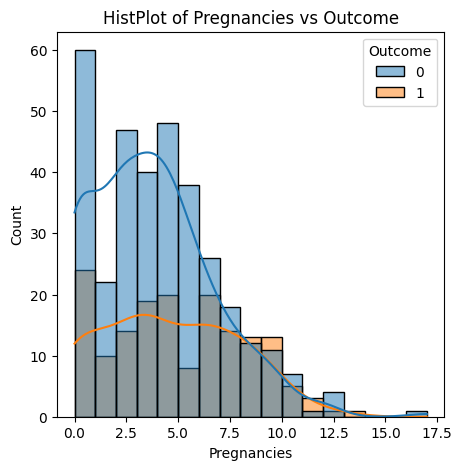

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data=synthetic_data,x='Pregnancies',hue='Outcome',kde=True)
plt.title('HistPlot of Pregnancies vs Outcome')
plt.show()

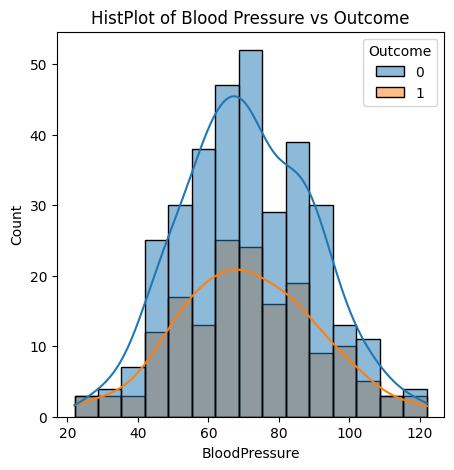

In [ ]:
#histoplot of Blood Pressure vs outcome
plt.figure(figsize=(5, 5))
sns.histplot(data=synthetic_data,x='BloodPressure',hue='Outcome',kde=True)
plt.title('HistPlot of Blood Pressure vs Outcome')
plt.show()

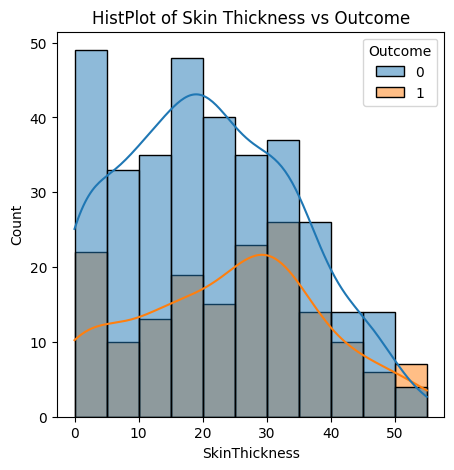

In [ ]:
#histoplot of age vs outcome
plt.figure(figsize=(5, 5))
sns.histplot(data=synthetic_data,x='SkinThickness',hue='Outcome',kde=True)
plt.title('HistPlot of Skin Thickness vs Outcome')
plt.show()

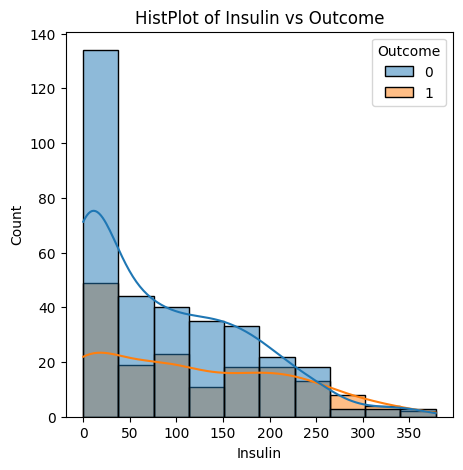

In [ ]:
#histoplot of age vs outcome
plt.figure(figsize=(5, 5))
sns.histplot(data=synthetic_data,x='Insulin',hue='Outcome',kde=True)
plt.title('HistPlot of Insulin vs Outcome')
plt.show()

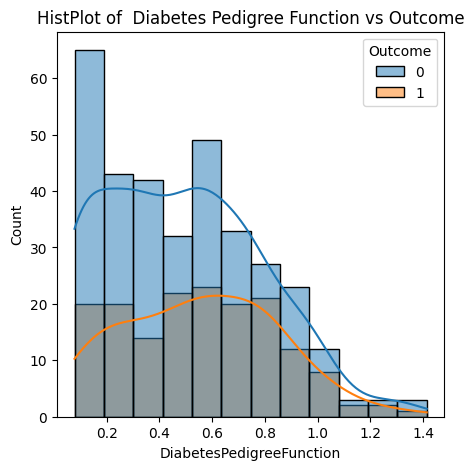

In [ ]:
#histplot of Diabetes Pedigree Function vs Outcome
plt.figure(figsize=(5, 5))
sns.histplot(data=synthetic_data,x='DiabetesPedigreeFunction',hue='Outcome',kde=True)
plt.title('HistPlot of  Diabetes Pedigree Function vs Outcome')
plt.show()

Splitting data into testing and training subsets. We chose a 20:80 split for this.

In [ ]:
#Testing training data split
import numpy as np

In [ ]:
split_ratio = 0.8  # 80% training, 20% testing
split_index = int(len(synthetic_data) * split_ratio)

train_data = synthetic_data.iloc[:split_index]
test_data = synthetic_data.iloc[split_index:]
train_data=train_data.reset_index();
test_data=test_data.reset_index();

In [ ]:
train_data.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,7,149,96,19,10,38.387409,0.561331,40,1
1,1,0,151,44,6,105,26.125923,0.463959,27,1
2,2,3,169,57,24,240,33.224573,0.541364,36,0
3,3,4,86,61,35,0,32.918264,0.526311,39,0
4,4,6,75,62,31,77,37.453830,0.178734,21,0


In [ ]:
test_data.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,400,9,138,71,33,261,28.490342,1.175800,32,1
1,401,2,110,54,11,47,28.639851,0.874332,37,0
2,402,6,75,92,22,38,22.888702,0.234965,46,0
3,403,3,112,99,0,0,29.176767,0.529916,45,0
4,404,6,121,80,17,260,26.451889,0.756473,36,0


Every feature in the given data has a different range in values. For example: Blood Pressure varies from 0 to 122 and DiabetesPedigreeFunction is in range 0.078 to 2.42. This can lead to the weights for gradient descent to vary a lot and thus take longer time and more iterations to converge.

Thus we try to fit all the data into the same range as the Outcome i.e. [0,1]. This will ensure that all the weights lie in a small range to ensure that gradient descent converges.

We use the **MIN_MAX Normalization** technique. Here we scale each column by setting the minimum value of each column as the origin and dividing by scaling factor of maximum - minimum. This ensures that the data is within [0,1]. We apply this normalization to both testing and training data to maintain consistency.

$$
\text{MIN_MAX NORMALIZATION} \\
$$
$\text{if X is set of values to be normalized then: }\\
$
$$
\text{for each }x\text{ in X :} \
\lbrace \ \ x ← \frac{x-min(X)}{max(X)-min(X)} \ \ \rbrace
$$

In [ ]:
#function for normalizing data
def normalize(df):
    for column in df.columns:
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return df

In [ ]:
#normalizing training data
train_data = normalize(train_data)
train_data.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.411765,0.729730,0.74,0.345455,0.026455,0.560510,0.361809,0.365385,1.0
1,0.002506,0.000000,0.740541,0.22,0.109091,0.277778,0.310449,0.288919,0.115385,1.0
2,0.005013,0.176471,0.837838,0.35,0.436364,0.634921,0.455219,0.346862,0.288462,0.0
3,0.007519,0.235294,0.389189,0.39,0.636364,0.000000,0.448972,0.335594,0.346154,0.0
4,0.010025,0.352941,0.329730,0.40,0.563636,0.203704,0.541470,0.075407,0.000000,0.0


In [ ]:
#normalizing test data
test_data = normalize(test_data)
test_data.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.750000,0.613924,0.439560,0.66,0.765396,0.407520,0.899515,0.224490,1.0
1,0.010101,0.166667,0.436709,0.252747,0.22,0.137830,0.411964,0.652498,0.326531,0.0
2,0.020202,0.500000,0.215190,0.670330,0.44,0.111437,0.240995,0.128614,0.510204,0.0
3,0.030303,0.250000,0.449367,0.747253,0.00,0.000000,0.427925,0.370290,0.489796,0.0
4,0.040404,0.500000,0.506329,0.538462,0.34,0.762463,0.346921,0.555927,0.306122,0.0


Outliers: Data points that do not fit the trend shown by remaining data. Outliers can skew the regression line towards them thus reducing the fit of the line to remaining data.

To remove outliers, we convert the data into a normal distribution and remove points that lie beyond $\pm2.7σ$ from the mean.

In [ ]:
def remove_outliers(df, threshold=2):
    # Calculate Z-scores for each column
    z_scores = np.abs((df - df.mean()) / df.std())

    # Identify rows with any Z-score greater than the threshold
    outliers = z_scores > threshold

    # Remove rows containing outliers
    df_cleaned = df[~outliers.any(axis=1)]

    return df_cleaned

# Set a Z-score threshold (e.g., 2)
z_threshold = 2.7

# Remove outliers from the DataFrame
synthetic_data = remove_outliers(synthetic_data, threshold=z_threshold)


# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [ ]:
train_data=train_data.drop(columns='index')

In [ ]:
test_data=test_data.drop(columns='index')

In [ ]:
train_data.head()
t_set=train_data

In [ ]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.750000,0.613924,0.439560,0.66,0.765396,0.407520,0.899515,0.224490,1.0
1,0.166667,0.436709,0.252747,0.22,0.137830,0.411964,0.652498,0.326531,0.0
2,0.500000,0.215190,0.670330,0.44,0.111437,0.240995,0.128614,0.510204,0.0
3,0.250000,0.449367,0.747253,0.00,0.000000,0.427925,0.370290,0.489796,0.0
4,0.500000,0.506329,0.538462,0.34,0.762463,0.346921,0.555927,0.306122,0.0


In [ ]:
X_t=t_set.drop(columns='Outcome')
Y_t=t_set['Outcome'].to_numpy()

In [ ]:
X_t.head()
b=X_t.shape[1]

In [ ]:
th=np.random.randn(b+1)
print(th)

[ 1.52997746  1.0908552   0.81979464  0.12169035 -1.26165038 -0.6034208
  1.98289208  0.99651964  1.02357378]


In [ ]:
numpy_array = X_t.to_numpy()

#Determine the number of rows in the DataFrame
num_rows = numpy_array.shape[0]

#Create a column of ones with the same number of rows as the DataFrame
ones_column = np.ones((num_rows, 1))

#Add the column of ones at the beginning of the NumPy array
numpy_array_with_ones_column = np.hstack((ones_column, numpy_array))

In [ ]:
def fico(y_t,th,_c):
    cost=0

    for i in range(len(y_t)):
        cost+=(((np.dot(_c[i],th))-y_t[i])**2)

    return cost

In [ ]:
lr=0.001
n=1000

In [ ]:
def hypo(_x, th):
    _sum = 0
    for j in range(len(th)):
        xj = _x[j - 1] if j > 0 else 1
        _sum += th[j] * xj

    return _sum

def stochastic_gradient(X,y,th,lr,n,_b):
    m=len(y)
    costs=np.zeros(n)
    for iteration in range(n):
        for i in range(len(Y_t)):
            for j in range(len(th)):
                xij = X[i][j - 1] if j > 0 else 1
                th[j]=th[j]-lr*(hypo(X[i], th) - y[i])*xij



        costs[iteration]=fico(y,th,_b)


    return th,costs



final_theta,costs = stochastic_gradient(X_t.to_numpy(),Y_t,th,lr,n,numpy_array_with_ones_column)

print("Final theta:",final_theta)

Final theta: [-0.48747417  0.40551301  1.03241603 -0.20989431  0.16810745 -0.13697451
  0.48179593  0.04355446 -0.08024883]


In [ ]:
num_test_samples = test_data.shape[0]

x_test = test_data.iloc[0:, 0:8]  # the features of the test data
ones = np.ones((num_test_samples,1))
x_test = np.concatenate((ones,x_test), axis=1)

y_test = np.array(test_data.iloc[0:, 8:]) # the target values of the test data

#y_predicted = np.dot(x_test, )
total_error_squared = 0
for i in range(num_test_samples):
  predicted_value = np.dot(x_test[i], final_theta)  # the predicted value for every sample calculated from the computed weights
  actual_value = y_test[i]  # the actual value, obtained from trimming the test data
  total_error_squared += (actual_value - predicted_value) ** 2  # summing the square of the error

mean_squared_error=total_error_squared/num_test_samples # calculating the mean of the squared errors
print("The Mean Squared Error (MSE) is " + str(mean_squared_error))



The Mean Squared Error (MSE) is [0.17529691]


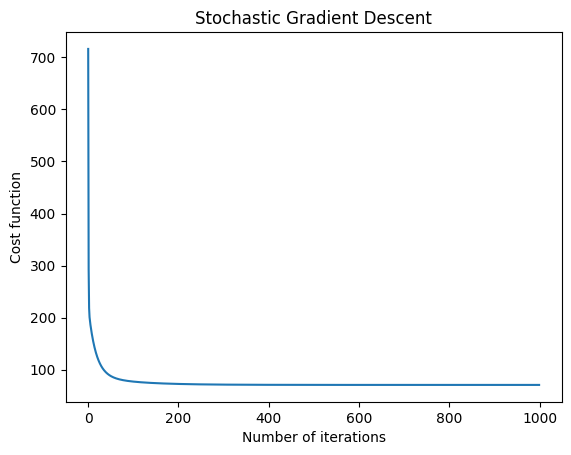

In [ ]:
plt.plot(costs)
sgd_cost = costs
plt.title("Stochastic Gradient Descent")
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.show()

In [ ]:
#test 1
weights = np.zeros(b+1)
learning_rate = 0.001
num_iterations = 1000
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost1 = costs

In [ ]:
#test 2
weights = np.zeros(b+1)
learning_rate = 0.002
num_iterations = 1000
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost2 = costs

In [ ]:
#test 3
weights = np.zeros(b+1)
learning_rate = 0.003
num_iterations = 1000
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost3 = costs

In [ ]:
#test 4
weights = np.zeros(b+1)
learning_rate = 0.004
num_iterations = 1000
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost4 = costs

In [ ]:
#test 5
weights = np.zeros(b+1)
learning_rate = 0.005
num_iterations = 800
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost5 = costs

In [ ]:
#test 6
weights = np.zeros(b+1)
learning_rate = 0.008
num_iterations = 400
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost6 = costs

In [ ]:
#test 7
weights = np.zeros(b+1)
learning_rate = 0.012
num_iterations = 300
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost7 = costs

In [ ]:
#test 8
weights = np.zeros(b+1)
learning_rate = 0.0008
num_iterations = 1400
final_weights,costs = stochastic_gradient(X_t.to_numpy(),Y_t, weights, learning_rate, num_iterations,numpy_array_with_ones_column)  # calling the stochastic descent function
sgd_cost8 = costs

In [ ]:
#test 9
weights_trajectories2 = np.zeros((1000, 9))
def hypo(_x, th):
    _sum = 0
    for j in range(len(th)):
        xj = _x[j - 1] if j > 0 else 1
        _sum += th[j] * xj

    return _sum

def stochastic_gradient(X,y,th,lr,n,_b):
    m=len(y)
    costs=np.zeros(n)

    for iteration in range(n):
        weights_trajectories2[iteration] =th
        for i in range(len(Y_t)):
            for j in range(len(th)):
                xij = X[i][j - 1] if j > 0 else 1
                th[j]=th[j]-lr*(hypo(X[i], th) - y[i])*xij



        costs[iteration]=fico(y,th,_b)


    return th,costs


th=np.zeros(b+1)
final_theta,costs = stochastic_gradient(X_t.to_numpy(),Y_t,th,lr,n,numpy_array_with_ones_column)

print("Final theta:",final_theta)

Final theta: [-0.48758405  0.40522099  1.03415905 -0.20931958  0.16931084 -0.13781582
  0.47898322  0.04327389 -0.08043649]


## **_Batch Gradient Descent_**

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that is just one step of gradient descent in one epoch.

We start by separating the features from the target values from the training data.

In [ ]:
x = train_data.iloc[0:, 0:8]  # all the columns in the training data except the last one are features
y = np.array(train_data['Outcome'])

We insert a one as a feature, to convert our hypothesis into the following summation
$$\begin{align*}h(\mathbf{x})= \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n = \sum_{j=0}^{n} \theta_j x_j = \boldsymbol{\theta}^\top \mathbf{x}
\end{align*}$$

In [ ]:
ones = np.ones((x.shape[0],1)) # an array on ones
x=np.concatenate((ones,x), axis=1)  # defining x0 as 1

We find the number of samples present in our training data which is equal to the number of rows in the training data, and the number of features.

In [ ]:
num_samples = train_data.shape[0]
num_features = x.shape[1]

Our cost function is defined by  

$$\begin{align*}J(\mathbf{\theta}) = \frac{1}{2m} \sum_{i=1}^m \left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2
\end{align*}$$
where our h(x) is our hypothesis defined by

$$\begin{align*}h(\mathbf{x}^{(i)}) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n
\end{align*}$$

Here, 'n' is the number of features and 'm' is the number of samples


In [ ]:
# cost function
def cost(data, weights):
  total_cost = 0
  for i in range(num_samples):
    hypothesis = np.dot(data[i], weights)
    total_cost += (1/(2*num_samples))*(hypothesis - y[i]) ** 2  # computing the cost according to the above formula
  return total_cost

The gradient desccent algorithm is defined as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
 θ_j &= θ_j -  \alpha \frac{\partial J(θ_j)}{\partial θ_j}  
\newline \rbrace
\end{align*}$$
  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(θ_j)}{\partial θ_j}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (h_{θ}(x^{(i)}) - y^{(i)})x^{(i)}
\end{align}
$$

Here n is the number of samples.

In [ ]:
# gradient descent
def batchGradientDescent(data, weights, learning_rate, num_iterations):
  costs = np.zeros(num_iterations)  # to store the value of the cost function at every iteration
  for i in range (num_iterations):  # every iteration
    partial_derivatives = np.zeros(num_features)  # stores the partial derivative of the cost function with respect to every θj
    for j in range (num_samples):
      for k in range (num_features):
        hypothesis = np.dot(data[j], weights) # hypothesis for every sample in the training data
        partial_derivatives[k] = partial_derivatives[k] + (1/num_samples)*(hypothesis - y[j])*data[j][k]
    weights = weights - learning_rate * partial_derivatives # updating the weights according to the gradient descent algorithm
    costs[i] = (cost(data, weights))  # storing the cost for every iteration, which decreases after every iteration
  return costs, weights

We run gradient descent using a learning rate of 0.25, for 1000 iterations

In [ ]:
# Runnning gradient descent
weights = np.zeros(num_features)
learning_rate = 0.25
num_iterations = 1000
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost = costs

The optimal weights for the features corresponding to the lowest value of the cost function are given by:

In [ ]:
print(final_weights)  # print the optimal weights obtained after running the gradient descent algorithm

[-0.47548201  0.39360142  1.02387749 -0.21186811  0.16946774 -0.12772497
  0.48153835  0.04675684 -0.06562132]


We test our linear regression model against the our testing data. We find the mean squared error between our predicted and the actual value.

In [ ]:
num_test_samples = test_data.shape[0]

x_test = test_data.iloc[0:, 0:8]  # the features of the test data
ones = np.ones((num_test_samples,1))
x_test = np.concatenate((ones,x_test), axis=1)

y_test = np.array(test_data['Outcome']) # the target values of the test data

total_error_squared = 0
for i in range(num_test_samples):
  predicted_value = np.dot(x_test[i], final_weights) # the predicted value for every sample calculated from the computed weights
  actual_value = y_test[i]  # the actual value, obtained from trimming the test data
  total_error_squared += (actual_value - predicted_value) ** 2  # summing the square of the error

mean_squared_error = total_error_squared/num_test_samples # calculating the mean of the squared errors
print("The Mean Squared Error (MSE) is " + str(mean_squared_error))

The Mean Squared Error (MSE) is 0.17730365642056303


In [ ]:
#test 1
weights = np.zeros(num_features)
learning_rate = 0.1
num_iterations = 1000
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost1 = costs

In [ ]:
#test 2
weights = np.zeros(num_features)
learning_rate = 0.2
num_iterations = 1000
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost2 = costs

In [ ]:
#test 3
weights = np.zeros(num_features)
learning_rate = 0.3
num_iterations = 1000
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost3 = costs

In [ ]:
#test 4
weights = np.zeros(num_features)
learning_rate = 0.4
num_iterations = 1000
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost4 = costs

In [ ]:
#test 5
weights = np.zeros(num_features)
learning_rate = 0.25
num_iterations = 500
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost5 = costs

In [ ]:
#test 6
weights = np.zeros(num_features)
learning_rate = 0.25
num_iterations = 800
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost6 = costs

In [ ]:
#test 7
weights = np.zeros(num_features)
learning_rate = 0.25
num_iterations = 1100
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost7 = costs

In [ ]:
#test 8
weights = np.zeros(num_features)
learning_rate = 0.25
num_iterations = 1400
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function
bgd_cost8 = costs

In [ ]:
#test 9
weights_trajectories = np.zeros((1000, 9))
def batchGradientDescent(data, weights, learning_rate, num_iterations):
  costs = np.zeros(num_iterations)  # to store the value of the cost function at every iteration
  for i in range (num_iterations):  # every iteration
    weights_trajectories[i] = weights
    partial_derivatives = np.zeros(num_features)  # stores the partial derivative of the cost function with respect to every θj
    for j in range (num_samples):
      for k in range (num_features):
        hypothesis = np.dot(data[j], weights) # hypothesis for every sample in the training data
        partial_derivatives[k] += (1/num_samples)*(hypothesis - y[j])*data[j][k]
    weights = weights - learning_rate * partial_derivatives # updating the weights according to the gradient descent algorithm
    costs[i] = (cost(data, weights))  # storing the cost for every iteration, which decreases after every iteration
  return costs, weights


weights = np.zeros(num_features)
learning_rate = 0.25
num_iterations = 1000
costs, final_weights = batchGradientDescent(x, weights, learning_rate, num_iterations)  # calling the gradient descent function

## **_Insights drawn (plots, markdown explanations)_**

## Convergence plots of the cost functions - Batch Gradient Descent vs Stochastic Gradient

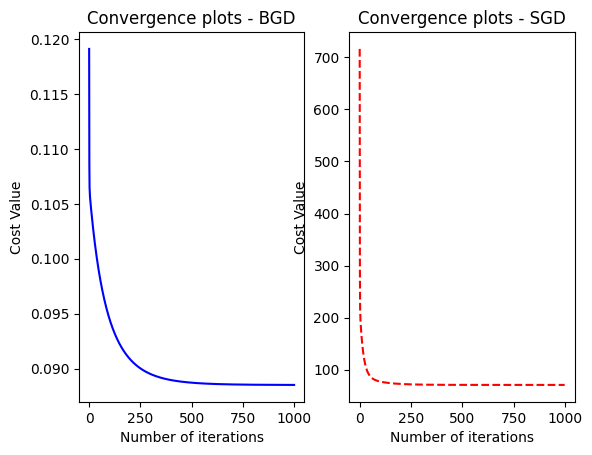

In [ ]:
# sgd_cost = np.full(1000, 0.1)

# Create an array of index values for the x-axis
index = np.arange(len(bgd_cost))

# Create a figure and axis object
fig, ax = plt.subplots(1,2)

ax[0].set_title('Convergence plots - BGD')
ax[1].set_title('Convergence plots - SGD')

# Plot bgd_cost and sgd_cost against the index values
ax[0].plot(index, bgd_cost, label='Batch Gradient Descent', linestyle='-', color='blue')
ax[1].plot(index, sgd_cost, label='Stochastic Gradient Descent', linestyle='--', color='red')


# Add labels and legend
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Cost Value')
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Cost Value')

# Show the plot
plt.show()

We see that the cost value function for batch gradient descent and stochastic gradient descent remains almost the same.

## Learning rate analysis
(Compare the effects of different learning rates on the convergence of BGD and SGD, Explain how a learning rate that is too high or too low can impact optimization.)

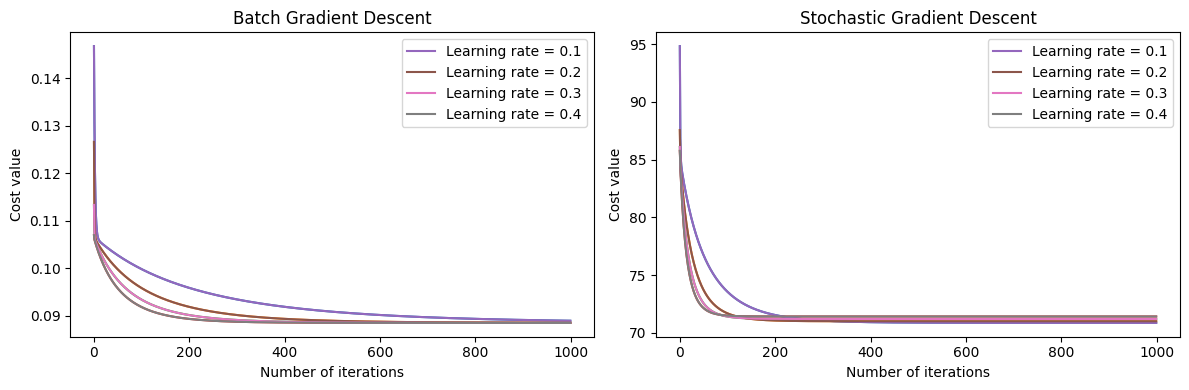

In [ ]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the left subplots
axes[0].plot(bgd_cost1)
axes[0].plot(bgd_cost2)
axes[0].plot(bgd_cost3)
axes[0].plot(bgd_cost4)
axes[0].set_xlabel('Number of iterations')
axes[0].set_ylabel('Cost value')
axes[0].set_title('Batch Gradient Descent')
axes[0].plot(index, bgd_cost1, label='Learning rate = 0.1')
axes[0].plot(index, bgd_cost2, label='Learning rate = 0.2')
axes[0].plot(index, bgd_cost3, label='Learning rate = 0.3')
axes[0].plot(index, bgd_cost4, label='Learning rate = 0.4')
axes[0].legend()

# Plot the right subplots
axes[1].plot(sgd_cost1)
axes[1].plot(sgd_cost2)
axes[1].plot(sgd_cost3)
axes[1].plot(sgd_cost4)
axes[1].set_xlabel('Number of iterations')
axes[1].set_ylabel('Cost value')
axes[1].set_title('Stochastic Gradient Descent')
axes[1].plot(index, sgd_cost1, label='Learning rate = 0.1')
axes[1].plot(index, sgd_cost2, label='Learning rate = 0.2')
axes[1].plot(index, sgd_cost3, label='Learning rate = 0.3')
axes[1].plot(index, sgd_cost4, label='Learning rate = 0.4')
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

We see that the cost value for batch gradient descent decreases much faster than for stochastic gradient descent

## Analyzing the weight trajectories

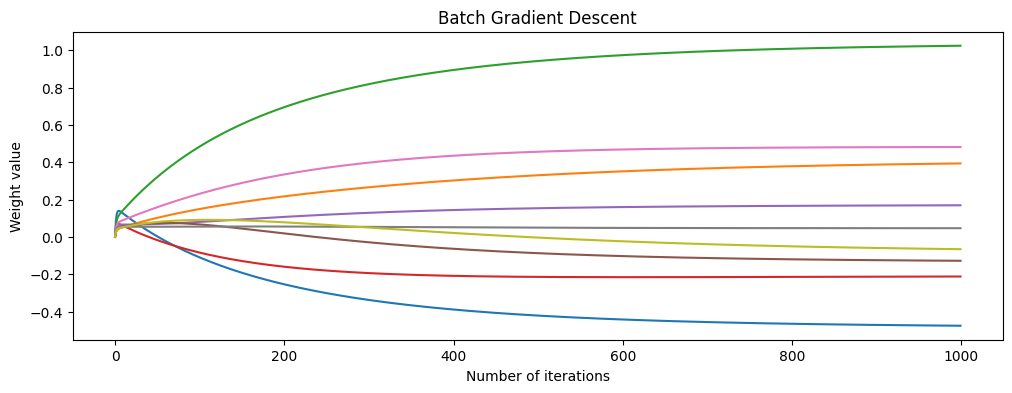

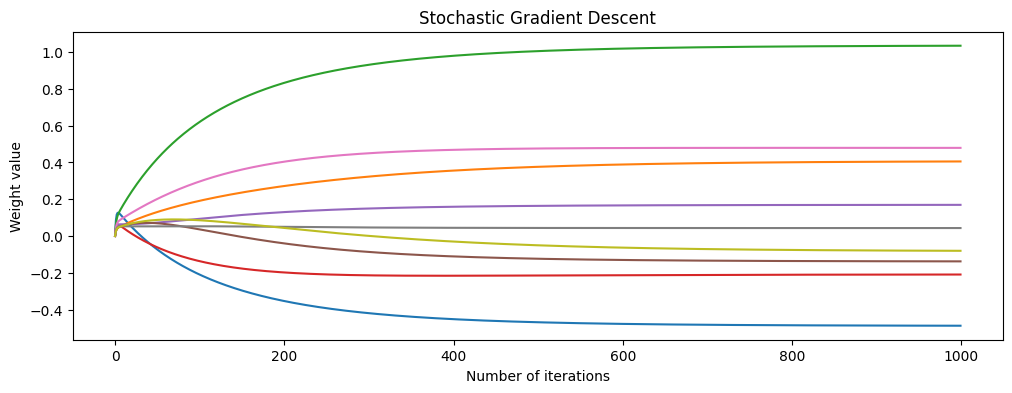

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
axes.set_xlabel('Number of iterations')
axes.set_ylabel('Weight value')
axes.set_title('Batch Gradient Descent')
axes.plot(weights_trajectories)
plt.show()
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
axes.set_xlabel('Number of iterations')
axes.set_ylabel('Weight value')
axes.set_title('Stochastic Gradient Descent')
axes.plot(weights_trajectories2)
plt.show()

We see that the weights vary more smoothly in general in the case of stochastic gradient descent than batch gradient descent

## Analyzing the relationship with the numner of iterations
Visualize the trajectory of the parameter updates (weights) during optimization for both BGD and SGD. You can create 2D or 3D plots showing how the weights change over iterations.
Discuss any patterns or differences in how the weights evolve.(?)


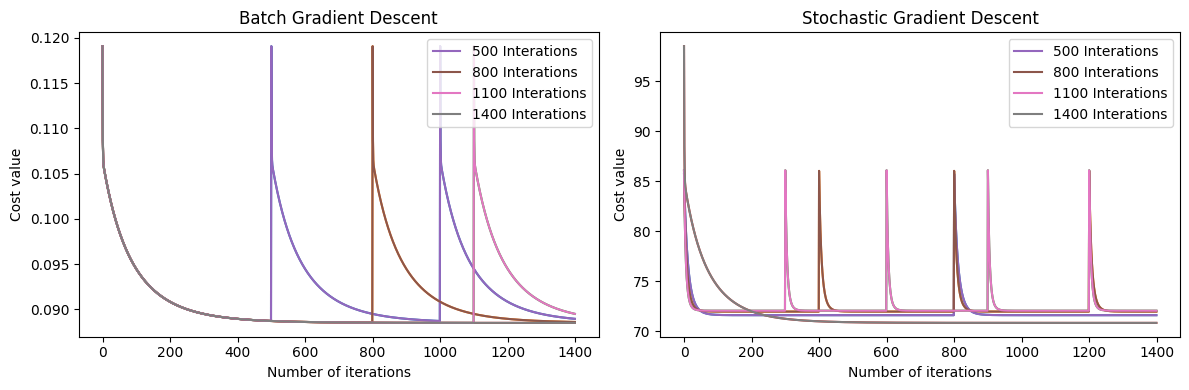

In [ ]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

index_new = np.arange(1400)
bgd_cost5 = np.resize(bgd_cost5, 1400)
bgd_cost6 = np.resize(bgd_cost6, 1400)
bgd_cost7 = np.resize(bgd_cost7, 1400)

# Plot the left subplots
axes[0].plot(bgd_cost5)
axes[0].plot(bgd_cost6)
axes[0].plot(bgd_cost7)
axes[0].plot(bgd_cost8)
axes[0].set_xlabel('Number of iterations')
axes[0].set_ylabel('Cost value')
axes[0].set_title('Batch Gradient Descent')
axes[0].plot(index_new, bgd_cost5, label='500 Interations')
axes[0].plot(index_new, bgd_cost6, label='800 Interations')
axes[0].plot(index_new, bgd_cost7, label='1100 Interations')
axes[0].plot(index_new, bgd_cost8, label='1400 Interations')
axes[0].legend()

# Plot the right subplots
sgd_cost5 = np.resize(sgd_cost5, 1400)
sgd_cost6 = np.resize(sgd_cost6, 1400)
sgd_cost7 = np.resize(sgd_cost7, 1400)

# Plot the left subplots
axes[1].plot(sgd_cost5)
axes[1].plot(sgd_cost6)
axes[1].plot(sgd_cost7)
axes[1].plot(sgd_cost8)
axes[1].set_xlabel('Number of iterations')
axes[1].set_ylabel('Cost value')
axes[1].set_title('Stochastic Gradient Descent')
axes[1].plot(index_new, sgd_cost5, label='500 Interations')
axes[1].plot(index_new, sgd_cost6, label='800 Interations')
axes[1].plot(index_new, sgd_cost7, label='1100 Interations')
axes[1].plot(index_new, sgd_cost8, label='1400 Interations')
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

We see that the intensity of spikes in cost value are very less in the case of batch gradient descent as compared to stochastic gradient descent

## Performance and Time Complexity comparison
Batch Gradient Descent (BGD):

BGD computes the gradient of the cost function with respect to the entire training dataset at each iteration.
The time complexity of BGD is primarily determined by the cost of calculating the gradient, which involves processing the entire training dataset.
The time complexity of BGD is typically O(m * n), where:
m is the number of training examples (the size of the dataset).
n is the number of features (the dimensionality of the data).
BGD usually requires a fixed number of iterations to converge, making it less sensitive to the choice of a learning rate.

Stochastic Gradient Descent (SGD):

SGD, on the other hand, updates the model parameters using a single randomly chosen training example (or a small batch of examples) at each iteration.
The time complexity of each iteration of SGD is O(n), where n is the number of features.
The overall time complexity of SGD depends on the number of iterations required for convergence.
SGD often converges faster per iteration than BGD because it processes a single example or a small batch, making it computationally more efficient.
However, the total time for convergence may be higher than BGD because it requires many more iterations to converge due to its noisy updates.

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**



**Polynomial Regression**: In polynomial regression we try and fit a polynomial curve to the training data. This can be more accurate when some features have a polynomial relation with the output variable.

$
\text{Say } (x_i,y_i) \  \text{is the } i^{th} \ \text{data point }\\
x_i=\text{Input Variable and }y_i=\text{Output Variable}\\ \\
  \text{Let }h(x_i,\vec{\theta}) \ \text{be the regression equation to fit this data where }\vec{\theta} \text{ is the } d\times1 \text{ weight vector or the vector of parameters}\\\text{Let }d\text{ be the degree of the polynomial we are trying to fit.}\\ $
$$
\vec{\theta} = \begin{pmatrix}
\theta_1 \\
\theta_2 \\
. \\
. \\
. \\
\theta_d \\
\end{pmatrix}_{d\times1}
$$  
$  
\text{Thus, the polynomial regression equation will be given by: }\\ \\ \\
$
$$
h(x_i,\vec{\theta}) = \sum_{j=1}^dx_i^jθ_j \ , \\
\text{where }\theta_j\text{ is the weight associated with the }j^{th}\text{ power of }x_i \\
$$
$
\text{Now for more features the regression equation becomes more complicated}\\
\text{This equation has terms of the form : }x_1^{p_1}\cdot x_2^{p_2} \cdot ...x_{m}^{p_m} \ such \ that \ ∑_{i=1}^mp_i ≤ d \ \text{ where }m\text{ is the number of features.} \\
\text{Polynomial Regression for multiple features is given by: }\\
$
$$
h(\vec{x},\vec{\theta}) = ∑_{i=1}^m\theta_ix_i \ +
∑_{i=1}^m∑_{j=1}^m\theta_{ij}(x_i ·x_j) \ + \ ... \ + ∑_{i_1=1}^m ∑_{i_2=1}^m... ∑_{i_d=1}^mθ_{i_1i_2...i_d}(x_{i_1} ⋅ x_{i_2} ⋅ \ ... \ \cdot x_{i_d}) \\
\text{where } \vec{\theta} \text{ and } \vec{x} \text{ are parameter and feature vectors respectively.}
$$
Linear Regression Models have two major problems: Overfitting and Underfitting.

* **Overfitting**: This happens when the model fits the training data very well but does not estimate unknown data as well i.e $Error(training \ data) →0$ but the error for unknown data is still large.
* **Underfitting** : This happens when the models does not fit the training data well i.e. the error is very high.

When the model has many features and/or dataset is small, the curve tends to overfit the data as the weights take large values to reduce the sum of squares error.

To overcome this problem we introduce a *budget* for the weights such that $f(\vec{\theta}) \le c$ where $c$ is the budget for the weights. Usually this function is some kind of sum of the weights like $f(\vec{\theta}) = θ_1+θ_2...+θ_k$ or $f(\vec{\theta}) = θ_1^2+θ_2^2...+θ_k^2$ etc.

This allows us to control the complexiety of the model and fit a rather complex model to a small dataset. This process is called **regularization**.

Let $E(\vec{\theta})$ be the error function for a regression model.Then the error function for a regularized regression model will b given by :

$$E_{regular}(\vec{\theta}) = E(\vec{\theta}) + λ\cdot f(\vec{\theta})$$


$λ\cdot f(\vec{\theta})$ is called **penalty** where $λ$ is the rate of regularization and it controls how much penalty is imposed when we minimize $E_{regular}(\vec{\theta})$

In [ ]:
#intializing X_train Y_train matrices
Y_train = train_data['Outcome'].to_numpy()
X_train = train_data.drop(['Outcome'],axis=1).to_numpy()
X0 = np.ones(X_train.shape[0])
X_train = np.column_stack((X_train, X0)) #adding the bias to each training example
X_train = X_train.transpose()
X_train.shape #dimensions for X_train

(9, 400)

In [ ]:
#intializing X_train Y_train matrices
X_test = test_data.to_numpy()
X_test = X_test[:,:X_test.shape[1]-1]
Y_test = test_data['Outcome'].to_numpy()
X0 = np.ones(X_test.shape[0])
X_test = np.column_stack((X_test, X0)) #adding the bias to each testing example
X_test = X_test.transpose()
X_test.shape #dimensions for X_test

(9, 100)

$$\text{Algorithm to create polynomial features} \\ \\ $$
$\text{Step 1 : Initialize the vector that is supposed to be converted to  polynomial features.}\\
$
$$
\vec{x} = \begin{pmatrix}
1 \\
x_1 \\
x_2 \\
. \\
. \\
. \\
x_m \\
\end{pmatrix}_{m\times1}\\
$$
$\text{where: m = number of features in the original dataset.}
\\
$

$ \text{Step 2: If degree is 1 return original vector otherwise do step 3}
$

$
\text{Step 3 : Initialize a new vector with values of } \vec{x}\\
\text{Step 4 : } repeat \ d-1 \ times \lbrace  \\
$
$$
\vec{newX} = \vec{x} \\
\vec{newX} ← \vec{newX} \cdot \vec{x}^T \\
\vec{newX} ← flatten(\vec{newX})\  \ \  \ \rbrace\\
$$
$\text{Here flatten(matrix) will convert a matrix into a vector by taking its elements row-wise } \\ \text{and arranging them in a column vector of size (row * column) x 1} \\ $

$\text{This algorithm will return a vector of size }m^d\times1. \\
\text{ Although some terms might be repeated the weights of the regression equation will compensate for it.}$
<br>
<br>
$$
\vec{X} = \begin{pmatrix}
x_{11} \ x_{12} \ ... \ x_{1n} \\
x_{21} \ x_{22} \ ... \ x_{2n}\\
. \\
. \\
. \\
x_{m1} \ x_{m2} \ ... \ x_{mn} \\
\end{pmatrix}_{m\times n}
flatten(\vec{X}) = \begin{pmatrix}
x_{11} \\
x_{12} \\
...\\
x_{1n} \\
x_{21} \\
...\\
x_{2n} \\
...\\
x_{m1}\\
...\\
x_{mn}
\end{pmatrix}_{(m \cdot n)\times1}\\
$$

In [ ]:
#algorithm to produce polynomial features
def makePolynomialFeatures(X,degree):
    if(degree==1):
        return X  #degree 1 polynomial
    res = X
    ans =  []
    for i in range(1,degree): #iteration over degree
        if(ans==[]):
            res = X
        else:
            res = np.array(ans).T
        ans = []
        for j in range(X.shape[1]): #iteration over number of training examples
            xvec = X[:,j][None,:]  # X vector of 1 x d size
            resvec = res[:,j][:,None] #vector of dimension d^i x 1
            xmult = np.dot(resvec,xvec)  #matrix of dimension d^i x d
            xmult = xmult.flatten() #vector of d^(i+1) x 1 size ie polynomial features for i+1 degree polynomial
            ans.append(xmult)  # add to list and continue for next training example
    return np.array(ans).T

In [ ]:
degree = 2

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

(81, 400)

In [ ]:
#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

# **_Lasso Regression_**



Lasso regression is also called L1 regularization. LASSO stands for Least Absolute Shrinkage and Selection Operator. It adds a penalty term to the error function forcing some weights to near 0 and is thus useful for feature selection as it discards irrelevant features. We use Lasso regression when the model has many features as Lasso will select only the relevant features.
<br>
<br>
$\text{Mathematical Setup for Lasso regression: } \\
$
$
X = \text{column vector of all features} \\
y = \text{output value for X input}\\
b = \text{weight vector} \\
p=\text{number of features}
$
$$
min_{b \ \in \ R^{\ p}} \lbrace \ \ \frac{1}{n}|| \ y-Xb \ ||_2^2 \ \ \rbrace \  \ \text{  subject to   } \ \  || \ b \ ||_1 \le c
$$
$$
\text{where, } \  \ ||z||_1 = ∑_{i=1}^m \ |z_i| \\
and  \ \ ||z||_2 = \sqrt{∑_{i=1}^m \ z_i^2}
$$
<br>
$
\text{The above optimization problem is equivatent to}
$
$$
min_b \ \lbrace \frac{1}{n}(y-Xb)^T(y-Xb) \ + \ λ ∑_{i=1}^p \ |b_i| \ \ \rbrace
$$
$
\text{where the error is given by: }\\
$
$$
E_{LASSO}(b) = \frac{1}{n}(y-Xb)^T(y-Xb) \ + \ λ ∑_{i=1}^p \ |b_i| \ \ \ \  \\
$$
$
\text{Here,  } \ λ ∑_{i=1}^p \ |b_i| \ \text{ is called the penalty term and }\lambda \ \text{ is called the regularization rate}
$

In [ ]:
#function to predict value for given input and weights
# y_hat = wTX
#this function can predcit value for the entire dataset together
def predictValueLasso(W,X):
    return np.dot(W.transpose(),X).transpose()

In [ ]:
#error function for LASSO regression
def errorLassoRegression(Y,W,X,regularization_rate):
    m = X.shape[1]
    y_hat = predictValueLasso(W,X) #(wTX)
      #print(y_hat)
    y_hat = subtract(Y,y_hat) #(y-wTX)
    y_hat = y_hat**2 #(y-wTX)^2
    error = np.sum(y_hat) #sum of (y-wTx)^2 over all training examples
    W = abs(W)
    error += regularization_rate * np.sum(W)  # adding penalty term
    return error

We use Gradient Descent to find the weights that minimize the cost function.

The gradient desccent algorithm is defined as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
 bj &← bj -  \alpha \frac{\partial  E_{LASSO}(b)}{\partial b}  
\newline \rbrace
\end{align*}$$
  
The gradient for lasso regression is defined as:
$$
\begin{align}
\frac{\partial E_{LASSO}(b)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (X^{(i)}b-y^{(i)})X^{(i)} \ \pm λ
\end{align}
$$

Here n is the number of samples and $\alpha$ is the learning rate.

The term $\lambda$ will be added to the gradient when the weight being updated is positive and subracted from the gradient when weight that is being updated is negative

In [ ]:
#subtract 2 arrays
def subtract(X,Y):
    for i in range(0,X.shape[0]):
        Y[i] = X[i]-Y[i]
    return Y

In [ ]:
#gradient descent for lasso regression
def lassoRegression(X,Y,W,regularization_rate,iterations,learning_rate=0.01):
   m = X.shape[1]
   dw = np.zeros(W.shape[0])  #gradient array
   cost = [] #recording cost function
   for itr in range(1,iterations+1):
      cost.append(errorLassoRegression(Y,W,X,regularization_rate)) #calculate cost for current values of W
      y_hat = predictValueLasso(W,X) #get y_hat = wTX value
      y_hat = subtract(Y,y_hat)
      y_hat = y_hat.transpose()
      #for each feature of X update its corresponding weight
      for k in range(0,W.shape[0]):
         if(W[k]>0):
            dw[k] = (-((2/m)*(y_hat.dot(X.T[:,k])) + regularization_rate)) #adding lambda as weight is >0
         elif(W[k]<0):
            dw[k] = (-((2/m)*(y_hat.dot(X.T[:,k])) - regularization_rate)) #subtracting lambda as weight is <=0
         else:
            dw[k] = (-((2/m)*(y_hat.dot(X.T[:,k])))) #when weight is 0
      W = subtract(W,learning_rate*dw) #updating weights
   return W,cost

### Test Run 1

In [ ]:
#parameter set 1
regularization_rate = 0.01
iterations = 1000
learning_rate = 0.01

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree
W.shape

(81,)

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_1 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_1 = predictValueLasso(W,X_test_polynomial)

### Test Run 2



In [ ]:
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree
W.shape

(81,)

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_2 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_2 = predictValueLasso(W,X_test_polynomial)

### Test Run 3

In [ ]:
regularization_rate = 0.1
iterations = 1000
learning_rate = 0.01

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree
W.shape

(81,)

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_3 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_3 = predictValueLasso(W,X_test_polynomial)

### Test Run 4

In [ ]:
regularization_rate = 0.00001
iterations = 1000
learning_rate = 0.01

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree
W.shape

(81,)

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_4 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_4 = predictValueLasso(W,X_test_polynomial)

### Test Run 5

In [ ]:
degree = 1
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree
W.shape

(9,)

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_5= lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_5 = predictValueLasso(W,X_test_polynomial)

### Test Run 6

In [ ]:
degree = 2
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_6 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_6 = predictValueLasso(W,X_test_polynomial)

### Test Run 7

In [ ]:
degree = 3
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_7 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_7 = predictValueLasso(W,X_test_polynomial)

### Test Run 8

In [ ]:
degree = 4
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_lass_8 = lassoRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_lass_8 = predictValueLasso(W,X_test_polynomial)

# _*Ridge Regression*_

Ridge regression, often referred to as L2 regularization, is used in Machine Learning to make regression models more stable and prevent overfitting . The term "Ridge" is used as it adds a penalty term to the error function. This penalty encourages our model to have balanced values for its variables, instead of letting them become very large .
<br>
<br>
$\text{Mathematical Setup for Ridge regression: } \\
$
$
X = \text{column vector of all features} \\
y = \text{output value for X input}\\
b = \text{weight vector} \\
p=\text{number of features}
$
$$
min_{b \ \in \ R^{\ p}} \lbrace \ \ \frac{1}{n}|| \ y-Xb \ ||_2^2 \ \ \rbrace \  \ \text{  subject to   } \ \  || \ b \ ||_2^2 \le c
$$
$$
\text{where, } \  \ ||z||_1 = ∑_{i=1}^m \ |z_i| \\
and  \ \ ||z||_2 = \sqrt{∑_{i=1}^m \ z_i^2}
$$
<br>
$
\text{The above optimization problem is equivatent to}
$
$$
min_b \ \lbrace \frac{1}{n}(y-Xb)^T(y-Xb) \ + \ λ ∑_{i=1}^p \ b_i^2 \ \ \rbrace
$$



In [ ]:
def predictValueRidge(W,X):
    return np.dot(W.transpose(),X).transpose()

In [ ]:
def errorRidgeRegresssion(Y,W,X,regularization_rate):
    m = X.shape[1]
    y_hat = predictValueRidge(W,X) #wTx
    y_hat = subtract(Y,y_hat) #(y-wTx)
    y_hat = y_hat**2 #(y-wTX)^2
    error = np.sum(y_hat) #sum over all training examples
    W = W**2 #square of weights
    error += regularization_rate * np.sum(W) #adding penalty term
    return error

We use Gradient Descent to find the weights that minimize the cost function.

The gradient desccent algorithm is defined as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
 bj &← bj -  \alpha \frac{\partial  E_{Ridge}(b)}{\partial b_j}  
\newline \rbrace
\end{align*}$$
  
The gradient for lasso regression is defined as:
$$
\begin{align}
\frac{\partial E_{Ridge}(b)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (X^{(i)}b-y^{(i)})X^{(i)} \ + 2λb
\end{align}
$$

Here n is the number of samples and $\alpha$ is the learning rate.

Each weight of the weight vector will be updated separately.

In [ ]:
def ridgeRegression(X,Y,W,regularization_rate,iterations,learning_rate):
   m = X.shape[1]
   dw = np.zeros(W.shape[0])
   cost = []
   for itr in range(1,iterations+1):
      cost.append(errorRidgeRegresssion(Y,W,X,regularization_rate))
      y_hat = predictValueRidge(W,X)
      y_hat = subtract(Y,y_hat)
      #print(eq(y_hat,Y,400))
      y_hat = y_hat.transpose()
      for k in range(0,W.shape[0]):
        dw[k] = (-((2/m)*(y_hat.dot(X.T[:,k])) + 2*regularization_rate*W[k]))
      W = subtract(W,learning_rate*dw)
      #print(itr)
      #print("\n")
   return W,cost


### Test Run 1

In [ ]:
#parameter set 1
degree = 2
regularization_rate = 0.01
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_1 = ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_1 = predictValueRidge(W,X_test_polynomial)

### Test Run 2

In [ ]:
#parameter set 2
degree = 2
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_2 = ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_2 = predictValueRidge(W,X_test_polynomial)

### Test Run 3

In [ ]:
#parameter set 3
degree = 2
regularization_rate = 0.1
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_3 = ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_3 = predictValueRidge(W,X_test_polynomial)

### Test Run 4

In [ ]:
#parameter set 4
degree = 2
regularization_rate = 0.00001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_4 =ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_4 = predictValueRidge(W,X_test_polynomial)

### Test Run 5

In [ ]:
#parameter set 5
degree = 1
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_5 =ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_5 = predictValueRidge(W,X_test_polynomial)

### Test Run 6

In [ ]:
#parameter set 6
degree = 2
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_6 = ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_6 = predictValueRidge(W,X_test_polynomial)

### Test Run 7

In [ ]:
#parameter set 7
degree = 3
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_7 = ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_7 = predictValueRidge(W,X_test_polynomial)

### Test Run 8

In [ ]:
#parameter set 8
degree = 4
regularization_rate = 0.001
iterations = 1000
learning_rate = 0.01

In [ ]:
X_train_polynomial = makePolynomialFeatures(X_train,degree); #make polynomial features for X
X_train_polynomial.shape #the new vector should be a features^degree x N size vector

#making polynomial featueres of testing data
X_test_polynomial = makePolynomialFeatures(X_test,degree)

In [ ]:
#initializing Weights to 0
W = np.zeros(X_train_polynomial.shape[0]) #there will be as many weights as the number of polynomial features ie features ^ degree

In [ ]:
#running gradient descent for lasso regression
W,cost_ridge_8 =ridgeRegression(X_train_polynomial,Y_train,W,regularization_rate,iterations,learning_rate)

In [ ]:
#predicting values using testing data
y_pred_ridge_8 = predictValueRidge(W,X_test_polynomial)

# **_Insights drawn_**

In [ ]:
#mean square error
def MeanSquareError(Y_test,y_pred):
  mse = np.mean((Y_test - y_pred)**2)
  return mse

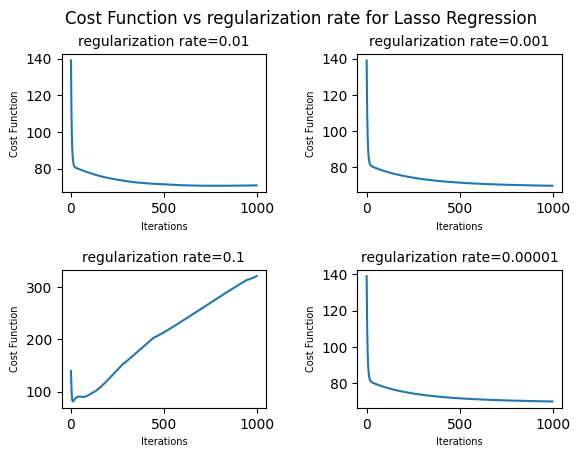

In [ ]:
figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=3.5)
figure.suptitle('Cost Function vs regularization rate for Lasso Regression')
X = range(len(cost_lass_1))
axis[0, 0].plot(X, cost_lass_1)
axis[0,0].set_xlabel('Iterations',fontsize=7)
axis[0,0].set_ylabel('Cost Function',fontsize=7)
axis[0, 0].set_title("regularization rate=0.01",fontsize=10)


axis[0, 1].plot(X, cost_lass_2)
axis[0,1].set_xlabel('Iterations',fontsize=7)
axis[0,1].set_ylabel('Cost Function',fontsize=7)
axis[0, 1].set_title("regularization rate=0.001",fontsize=10)


axis[1, 0].plot(X, cost_lass_3)
axis[1,0].set_xlabel('Iterations',fontsize=7)
axis[1,0].set_ylabel('Cost Function',fontsize=7)
axis[1, 0].set_title("regularization rate=0.1",fontsize=10)


axis[1, 1].plot(X, cost_lass_4)
axis[1,1].set_xlabel('Iterations',fontsize=7)
axis[1,1].set_ylabel('Cost Function',fontsize=7)
axis[1, 1].set_title("regularization rate=0.00001",fontsize=10)
plt.show()

The above figure shows the different covergence curves for different regularization rates

As the regularization rate decreases from 0.1 the curve is seen to take more time to flatten and reach minima

For regularization_rate = 0.00001 the curve is seen to be decreasing even after 1000 iterations implying it didnt reach minima as fast as the others.

For regularization rate of 0.1 the cost function is seen to increase drastically implying that the algorithm has completely missed the minima and probably will not be able to converge.

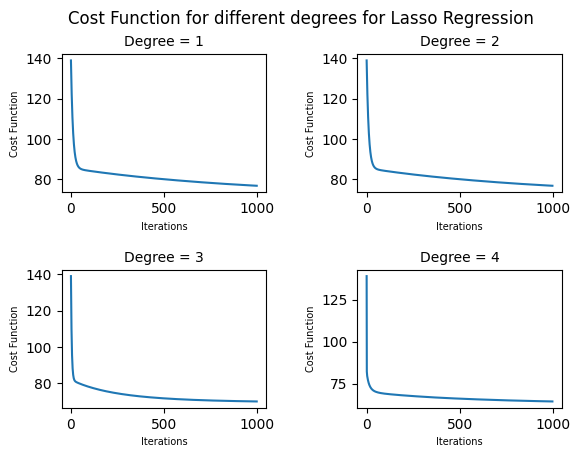

In [ ]:
figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=3.5)
figure.suptitle('Cost Function for different degrees for Lasso Regression')
X = range(len(cost_lass_1))
axis[0, 0].plot(X, cost_lass_5)
axis[0, 0].set_title("Degree = 1",fontsize=10)
axis[0,0].set_xlabel('Iterations',fontsize=7)
axis[0,0].set_ylabel('Cost Function',fontsize=7)

axis[0, 1].plot(X, cost_lass_5)
axis[0, 1].set_title("Degree = 2",fontsize=10)
axis[0,1].set_xlabel('Iterations',fontsize=7)
axis[0,1].set_ylabel('Cost Function',fontsize=7)

axis[1, 0].plot(X, cost_lass_6)
axis[1, 0].set_title("Degree = 3",fontsize=10)
axis[1,0].set_xlabel('Iterations',fontsize=7)
axis[1,0].set_ylabel('Cost Function',fontsize=7)

axis[1, 1].plot(X, cost_lass_8)
axis[1, 1].set_title("Degree = 4",fontsize=10)
axis[1,1].set_xlabel('Iterations',fontsize=7)
axis[1,1].set_ylabel('Cost Function',fontsize=7)
plt.show()

The convergence curves for $1^{st}$ and $2^{nd}$ degree polynomials are almost the same where as $3^{rd}$ and $4^{th}$ degree polynomial is seen to be decreasing fastest. But since these polynomials are decreasing rapidly and give similar convergence curves to $1^{st}$ and $2^{nd}$ we can say that the $3^{rd}$ and $4^{th}$ degree features are irrelevant to the data and are thus begin eliminated by feature selection.

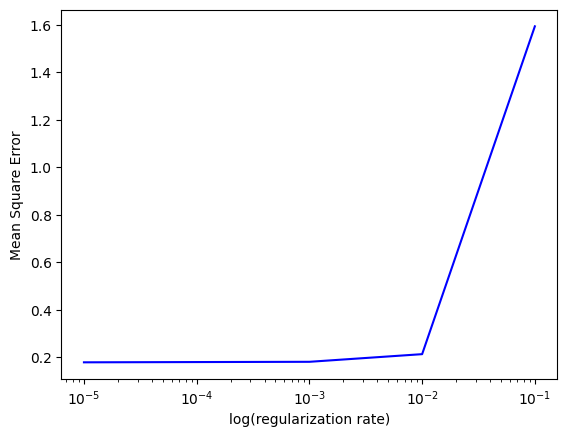

In [ ]:
mse = [MeanSquareError(Y_test,y_pred_lass_4),MeanSquareError(Y_test,y_pred_lass_2),MeanSquareError(Y_test,y_pred_lass_1),MeanSquareError(Y_test,y_pred_lass_3)]
alpha = [0.00001,0.001,0.01,0.1]
plt.plot(alpha, mse, label='Linear Scale', color='blue')
plt.xscale('log')
plt.xlabel('log(regularization rate)')
plt.ylabel('Mean Square Error')
plt.show()

The above graph shows the mean square error vs regularization rate for testing data. It is clear that as the regularization rate increases with increasing learning rate but we cannot conclude that there is overfitting for regularization_rate = 0.1 as the cost function diverges for that model.

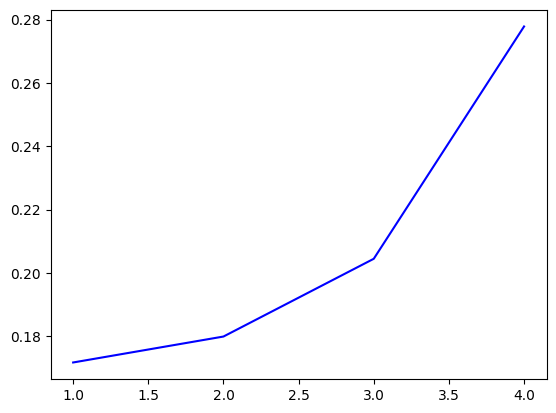

In [ ]:
mse = [MeanSquareError(Y_test,y_pred_lass_5),MeanSquareError(Y_test,y_pred_lass_6),MeanSquareError(Y_test,y_pred_lass_7),MeanSquareError(Y_test,y_pred_lass_8)]
plt.plot([1,2,3,4], mse, label='Linear Scale', color='blue')
plt.show()

The above graph shows the mean square error vs degree of polynomial for testing data. It is clear that as the degree increases the MSE also increases. The increased MSE for degree 4 polynomial means that the model is overfitted to training data.

Text(0.5, 1.0, 'regularization rate=0.00001')

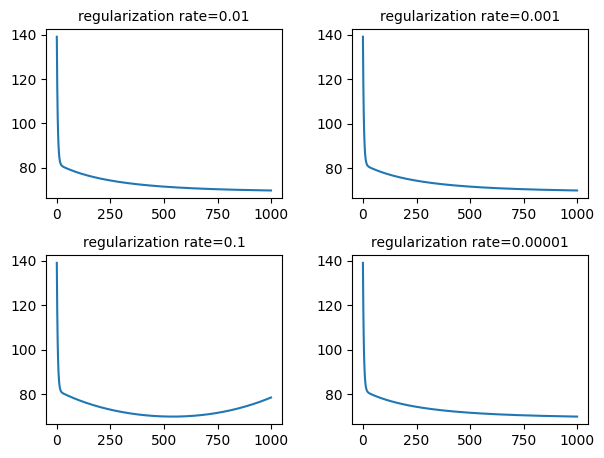

In [ ]:
figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=2)
X = range(len(cost_lass_1))
axis[0, 0].plot(X, cost_ridge_1)
axis[0, 0].set_title("regularization rate=0.01",fontsize=10)


axis[0, 1].plot(X, cost_ridge_2)
axis[0, 1].set_title("regularization rate=0.001",fontsize=10)


axis[1, 0].plot(X, cost_ridge_3)
axis[1, 0].set_title("regularization rate=0.1",fontsize=10)


axis[1, 1].plot(X, cost_ridge_4)
axis[1, 1].set_title("regularization rate=0.00001",fontsize=10)

The above plots show the convergence curves at different regularization rates. Except for regularization_rate=0.1, the other curves look almost similar with slightly different inflection points.

The interesting property that is observed is with regularization_rate= 0.1 where Ridge Regression shows more minimization than Lasso Regression.

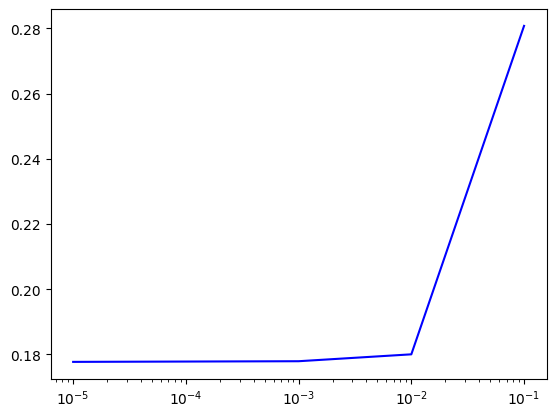

In [ ]:
mse = [MeanSquareError(Y_test,y_pred_ridge_4),MeanSquareError(Y_test,y_pred_ridge_2),MeanSquareError(Y_test,y_pred_ridge_1),MeanSquareError(Y_test,y_pred_ridge_3)]
alpha = [0.00001,0.001,0.01,0.1]
plt.plot(alpha, mse, label='Linear Scale', color='blue')
plt.xscale('log')
plt.show()

The above plot is for MSE vs Regularization Rate

As the regularization rate increases the MSE also increases and by the cost function plots we can see that at higher regularization rate the gradient diverges.

Text(0.5, 1.0, 'Degree = 4')

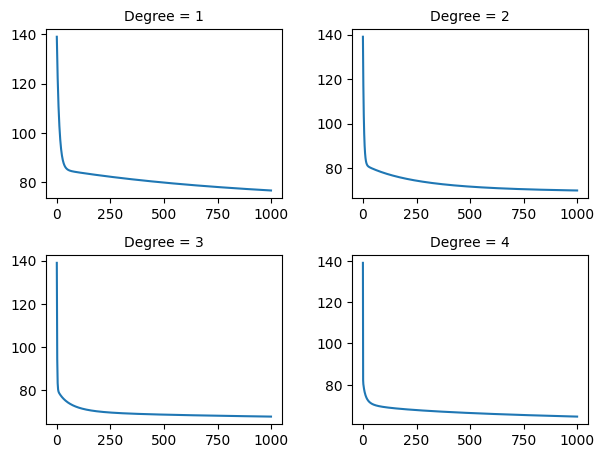

In [ ]:
figure, axis = plt.subplots(2, 2)
figure.tight_layout(pad=2)
X = range(len(cost_ridge_1))
axis[0, 0].plot(X, cost_ridge_5)
axis[0, 0].set_title("Degree = 1",fontsize=10)


axis[0, 1].plot(X, cost_ridge_6)
axis[0, 1].set_title("Degree = 2",fontsize=10)


axis[1, 0].plot(X, cost_ridge_7)
axis[1, 0].set_title("Degree = 3",fontsize=10)


axis[1, 1].plot(X, cost_ridge_8)
axis[1, 1].set_title("Degree = 4",fontsize=10)

The above plot is for convergence curves for different degree polynomials. We can see for higher degree polynomials the curve converges faster.

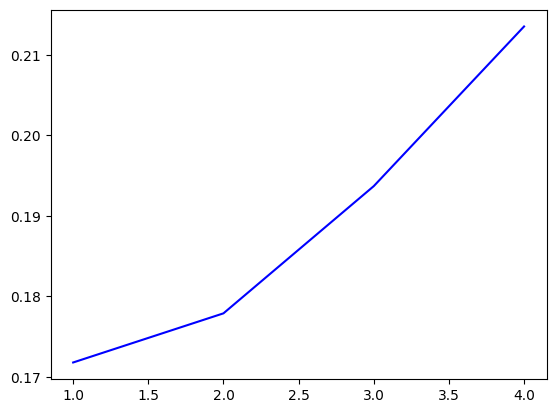

In [ ]:
mse = [MeanSquareError(Y_test,y_pred_ridge_5),MeanSquareError(Y_test,y_pred_ridge_6),MeanSquareError(Y_test,y_pred_ridge_7),MeanSquareError(Y_test,y_pred_ridge_8)]
plt.plot([1,2,3,4], mse, label='Linear Scale', color='blue')
plt.show()

The above plot is for Mean Square Error vs Degree of Polynomial for testing data.

As the degree of the polynoimal increased the MSE for training data also increases. Since the cost curve for degree 4 polynomial has converged and as MSE is high it means that higher degree polynomials are overfitted to the training data.

# **_5. Comparison of Logistic Regression and Least Squares Classification_**



## **_Logistic Regression_**

Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict a binary outcome, typically represented as 0 or 1 (e.g., Yes or No, True or False). Here's how it works:

1. **Sigmoid Function:** Logistic regression uses the sigmoid function (also known as the logistic function) to model the probability that a given input belongs to one of the two classes. The sigmoid function is defined as:

   $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

   Here, \(z\) is the linear combination of input features and their corresponding weights, plus a bias term:

   $$z = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n$$

   - $w_0$ is the bias term.
   - $w_1, w_2, \ldots, w_n$ are the weights associated with the input features $x_1, x_2, \ldots, x_n$.

2. **Modeling Probability:** The sigmoid function maps the input \(z\) to a value between 0 and 1. In the context of logistic regression, this value represents the probability that the input belongs to the positive class (class 1). The closer the probability is to 1, the more confident the model is that the input belongs to class 1. Conversely, the closer the probability is to 0, the more confident the model is that the input belongs to the negative class (class 0).


3. **Training the Model:** The goal of training a logistic regression model is to find the best values for the weights $w_0, w_1, w_2, \ldots, w_n$ that minimize the difference between the predicted probabilities and the actual class labels in the training data.

   - The model uses a cost function  to quantify the difference between predicted probabilities and actual labels.
   - For a single training example with true label $y$ (either 0 or 1) and predicted probability $p_1$:

      $
      \text{Log Loss} = -\left(y \cdot \log(p_1) + (1 - y) \cdot \log(1 - p_1)\right)
      $

      In this formulation:

      - $y$ is the true binary class label (0 or 1) for the training example.
      - $p_1$ is the predicted probability that the training example belongs to class 1.

      The interpretation:

      - When $y = 1$, the loss increases as $p_1$ deviates from 1.
      - When $y = 0$, the loss increases as $p_1$ deviates from 0.
  -Cost function is the sum of log loss for all the training examples divivded by the number of training examples.

   - Optimization algorithms like gradient descent are used to minimize the cost function and update the weights iteratively.

4. **Making Predictions:** Once the model is trained and the optimal weights are determined, you can use the sigmoid function to predict the probability of an input belonging to the positive class. Typically, a threshold (e.g., 0.5) is chosen, and if the predicted probability is above the threshold, the input is classified as class 1; otherwise, it's classified as class 0.


In [ ]:
#converting labels into one hot encoding to use matrices for weights for least square classification
def one_hot_encode(Y_matrix):
  one_hot_labels = np.zeros((len(Y_matrix), 2))
  for i, label in enumerate(Y_matrix):
    one_hot_labels[i, label] = 1
  return one_hot_labels

In [ ]:
def confusion_matrix(actual, predicted):
    # Initialize counts for TP, FP, TN, FN
    TP = FP = TN = FN = 0

    # Iterate through actual and predicted labels
    for i in range(0, len(actual)):
        if actual[i] == 1:
            if predicted[i] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if predicted[i] == 1:
                FP += 1
            else:
                TN += 1

    # Return the confusion matrix as a dictionary
    return {'TP': TP, 'FP': FP, 'TN': TN, 'FN': FN}


In [ ]:
X_train = train_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X_test = test_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [ ]:
Y_train = train_data['Outcome']
Y_test = test_data['Outcome']

In [ ]:
X_train_matrix = X_train.to_numpy()
X_train_matrix = np.hstack((np.ones((X_train_matrix.shape[0], 1)), X_train_matrix))
X_test_matrix = X_test.to_numpy()
X_test_matrix = np.hstack((np.ones((X_test_matrix.shape[0], 1)), X_test_matrix))
Y_train_matrix = Y_train.to_numpy().astype(int)
Y_train_one_hot = one_hot_encode(Y_train_matrix)
Y_test_matrix = Y_test.to_numpy().astype(int)
Y_test_one_hot = one_hot_encode(Y_test_matrix)

In [ ]:
#defining the sigmoid function for logistic regression

def sigmoid(z):
    z=z.astype(np.float128)
    return 1 / (1 + np.exp(-z))

In [ ]:
#defining thw cost function
#using the function  -(1/m) * np.sum(y * np.log(y_pred+epsilon) + (1-y) * np.log(1-y_pred+epsilon))

def cost_function(y, y_pred):
    m = len(y)
    epsilon = 1
    return -(1/m) * np.sum(y * np.log(y_pred+epsilon) + (1-y) * np.log(1-y_pred+epsilon))

In [ ]:
#gradient descent to get the weights such that the cost function is minimised
#theta is the weight matrix

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)

        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient

        cost = cost_function(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
Y_train_matrix = Y_train_matrix.reshape(X_train_matrix.shape[0], 1)
Y_test_matrix = Y_test_matrix.reshape(X_test_matrix.shape[0], 1)

In [ ]:
#initialise the theta matrix with zeros
theta = np.zeros((X_train_matrix.shape[1], 1))

In [ ]:
#alpha = learning rate

alpha = 0.0485
iterations = 5500

In [ ]:
theta, cost_history = gradient_descent(X_train_matrix, Y_train_matrix, theta, alpha, iterations)

In [ ]:
#the value we get after plugging in the X values in the sigmoid function after taking dot with the weights
#if the value is more than or equal to 0.5, we assign it to class 1, i.e, diabetic
#else we assign it to class 0, i.e., non-diabetic

def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probabilities]

In [ ]:
predictions = predict(X_test_matrix, theta)

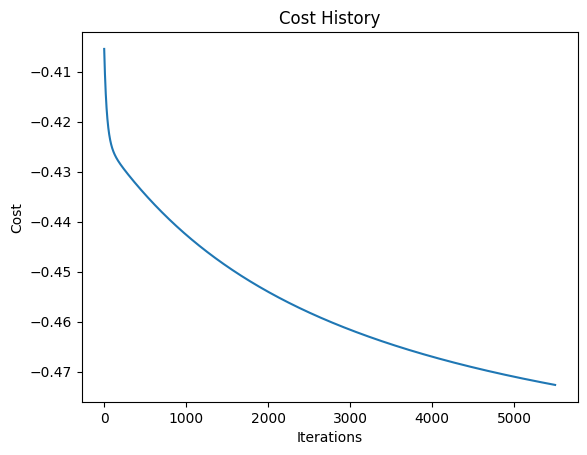

In [ ]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [ ]:
accuracy = np.mean(predictions == Y_test_matrix)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 59.12%


## **_Least Squares Classification_**

 **Here's a step-by-step explanation of how it works:**

**1. Binary or Multiclass Classification:**
   - Least Squares Classification can be used for both binary classification (two classes) and multiclass classification (more than two classes).
   
**2. Linear Model:**
   - It employs a linear model to make predictions. This means it assumes that there exists a linear combination of the input features that can effectively separate the classes.

**3. Weight Vector and Bias Term:**
   - To define this linear model, Least Squares Classification uses a weight vector (often denoted as $W$) that represents the importance of each feature in the classification.
   - Additionally, it includes a bias term (often denoted as $b$) that allows the model to shift the decision boundary away from the origin.

**4. Cost Function:**
   - The primary objective is to find the optimal values of the weight vector $W$ and the bias term $b$ that minimize the sum of squared differences between the predicted values and the actual class labels.
   - Mathematically, the cost function is expressed as:

     $$\
     \min_{W, b} \sum_{i=1}^{N} \left\|Y_i - (X_i^T \cdot W + b)\right\|^2
     \$$

     Where:
     - $N$ is the number of data points.
     - $Y_i$ represents the true class labels.
     - $X_i^T$ is the transpose of the feature vector for data point $\(i\)$.
     - $W$ is the weight vector.
     - $b$ is the bias term.
     - $X_i^T \cdot W + b$ calculates the predicted values for data point \$(i\)$.

**5. Optimization:**
   - Various optimization techniques can be used to find the optimal values of $W$ and $b$ that minimize the objective function. Common methods include gradient descent or closed-form solutions like the Normal Equation.

**6. Decision Boundary:**
   - Once the optimal $W$ and $b$ are determined, the decision boundary is defined by the equation $X^T \cdot W + b = 0$.
   - Data points on one side of this boundary are classified as one class, and data points on the other side are classified as the other class.

**7. Classification:**
   - To classify a new data point, you compute $X^T \cdot W + b$. If the result is greater than or equal to 0, you classify the point as one class; otherwise, you classify it as the other class.

**8. Keep in mind:**
   - Least squares classification does not work as well as some of its alternatives, like, say logistic regression for classification since it is, in essence a linear method for classification and if the data does not fit the assumption, then it fails.




In [ ]:
X_train_matrix = X_train.to_numpy()
X_train_matrix = np.hstack((np.ones((X_train_matrix.shape[0], 1)), X_train_matrix))
X_test_matrix = X_test.to_numpy()
X_test_matrix = np.hstack((np.ones((X_test_matrix.shape[0], 1)), X_test_matrix))
Y_train_matrix = Y_train.to_numpy().astype(int)
Y_train_one_hot = one_hot_encode(Y_train_matrix)
Y_test_matrix = Y_test.to_numpy().astype(int)
Y_test_one_hot = one_hot_encode(Y_test_matrix)

In [ ]:
# We use the closed Normal form to solve it here.
# We use the formula: W = (X^T * X)^(-1) * X^T * Y_one_hot
W_with_0 = np.linalg.inv(X_train_matrix.T.dot(X_train_matrix)).dot(X_train_matrix.T).dot(Y_train_one_hot)

In [ ]:
#using X*W=Y

def predict(X_test_matrix, W_with_zero):
  return X_test_matrix.dot(W_with_zero)

In [ ]:
predictions = predict(X_test_matrix, W_with_0)

In [ ]:
#accuracy in the test set
predicted_classes_test = np.argmax(predictions, axis=1)
correct_predictions = (predicted_classes_test == Y_test_matrix)
accuracy = np.mean(correct_predictions)
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.71


In [ ]:
#accuracy in the test set
predicted_classes_test = np.argmax(predictions, axis=1)
correct_predictions = (predicted_classes_test == Y_test_matrix)
accuracy = np.mean(correct_predictions)
print("Accuracy on Test Data:", accuracy)

conf=confusion_matrix(Y_test_matrix, predicted_classes_test)
print(conf)

Accuracy on Test Data: 0.71
{'TP': 16, 'FP': 19, 'TN': 55, 'FN': 10}


## **_Insights drawn (plots, markdown explanations)_**

In [ ]:
arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
acc = []
for i in arr:
    predi=predicti(X_test_matrix, theta, i)
    accuracy = np.mean(predi == Y_test_matrix)
    acc.append(accuracy)

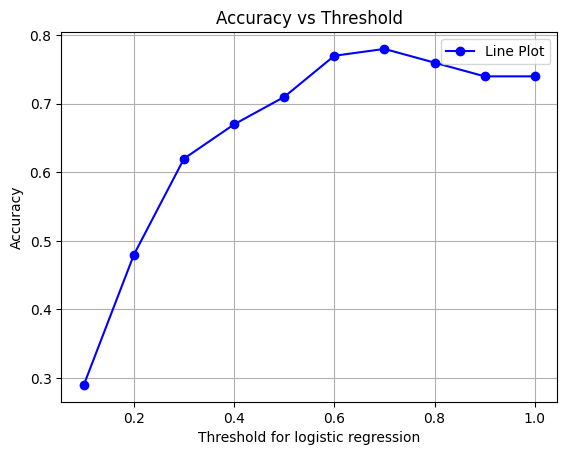

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(arr, acc, marker='o', linestyle='-', color='b', label='Line Plot')

# Add labels and title
plt.xlabel('Threshold for logistic regression')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')

# Add a legend (if needed)
plt.legend()

# Display the plot
plt.grid(True)  # Add grid lines (optional)
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, predict(X_test_matrix, theta))
print(conf_matrix)

{'TP': 0, 'FP': 0, 'TN': 74, 'FN': 26}


From the confusion matrix:

```
{'TP': 13, 'FP': 14, 'TN': 58, 'FN': 12}
```

Where:
- TP (True Positives) = 13
- FP (False Positives) = 14
- TN (True Negatives) = 58
- FN (False Negatives) = 12

We can draw several insights regarding the performance of our logistic regression model:

1. **Accuracy:** We can calculate the accuracy, which is the proportion of correctly classified instances out of the total:

   Accuracy = (TP + TN) / (TP + FP + TN + FN) = (13 + 58) / (13 + 14 + 58 + 12) = 71 / 97 ≈ 0.731

   The model has an accuracy of approximately 73.1%.

2. **Precision:** Precision measures how many of the positively predicted instances were actually true positives:

   Precision = TP / (TP + FP) = 13 / (13 + 14) ≈ 0.481

   The precision of the model is approximately 48.1%.

3. **Recall (Sensitivity):** Recall, also known as sensitivity or true positive rate, measures how many of the actual positives were correctly classified:

   Recall = TP / (TP + FN) = 13 / (13 + 12) ≈ 0.520

   The recall of the model is approximately 52.0%.

4. **Specificity:** Specificity measures how many of the actual negatives were correctly classified as negatives:

   Specificity = TN / (TN + FP) = 58 / (58 + 14) ≈ 0.806

   The specificity of the model is approximately 80.6%.

5. **F1-Score:** The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics:

   F1-Score = 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.500

   The F1-score of the model is approximately 50.0%.

6. **False Positive Rate (FPR):** FPR measures the proportion of actual negatives that were incorrectly classified as positives:

   FPR = FP / (FP + TN) = 14 / (14 + 58) ≈ 0.194

   The false positive rate is approximately 19.4%.

7. **False Negative Rate (FNR):** FNR measures the proportion of actual positives that were incorrectly classified as negatives:
   
   FNR = FN / (FN + TP) = 12 / (12 + 13) ≈ 0.480

   The false negative rate is approximately 48.0%.


---



Similarly the confusion matrix for our Least Squares Classification was :


```
{'TP': 15, 'FP': 18, 'TN': 54, 'FN': 10}
```

Where:
- TP (True Positives) = 15
- FP (False Positives) = 18
- TN (True Negatives) = 54
- FN (False Negatives) = 10

Using the same metrics:

1. **Accuracy**:
  
   Accuracy = (TP + TN) / (TP + FP + TN + FN) = (15 + 54) / (15 + 18 + 54 + 10) = 69 / 97 ≈ 0.711

   The model has an accuracy of approximately 71.1%.

2. **Precision**:

   Precision = TP / (TP + FP) = 15 / (15 + 18) ≈ 0.455

   The precision of the model is approximately 45.5%.

3. **Recall (Sensitivity)**:

   Recall = TP / (TP + FN) = 15 / (15 + 10) ≈ 0.600

   The recall of the model is approximately 60.0%.

4. **Specificity**:

   Specificity = TN / (TN + FP) = 54 / (54 + 18) ≈ 0.750

   The specificity of the model is approximately 75.0%.

5. **F1-Score**:

   F1-Score = 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.514

   The F1-score of the model is approximately 51.4%.

6. **False Positive Rate (FPR)**:

   FPR = FP / (FP + TN) = 18 / (18 + 54) ≈ 0.250

   The false positive rate is approximately 25.0%.

7. **False Negative Rate (FNR)**:

   FNR = FN / (FN + TP) = 10 / (10 + 15) ≈ 0.400

   The false negative rate is approximately 40.0%.

These insights show the least square classifier model's performance metrics based on the new confusion matrix. Comparing these metrics to the logistic one, we can see how the model's performance has changed. In this case, the model has a slightly lower precision and specificity but a higher recall compared to the logistic one.


---



The choice between two models for diabetes prediction

1. **Accuracy vs. Sensitivity/Recall:**
   - If we want to minimize false negatives (i.e., correctly identifying all individuals with diabetes to ensure they receive necessary care), we may choose a model with higher sensitivity/recall. In this case, the
   least square classifier

   - If overall accuracy is more important and we want to balance both true positives and true negatives, then the model with higher accuracy (logistic) could be chosen.

2. **Precision vs. False Positives:**
   - If we want to minimize false positive predictions (i.e., avoid misclassifying individuals as having diabetes when they do not), we may choose a model with higher precision which is logistic
   - However, we should also consider the consequences and costs associated with false positives in your application. In some cases, it might be more acceptable to have some false positives if it means capturing more true cases of diabetes.

3. **Specificity vs. FPR:**
   - The logistic has a higher specificity, meaning it's better at correctly classifying non-diabetic individuals as negative. If avoiding unnecessary testing for non-diabetic individuals is wanted, this model may be preferred.
   - The least square has a lower false positive rate (FPR), indicating it makes fewer incorrect positive predictions, which can be important if false positives have significant consequences.

4. **F1-Score:**
   - The F1-score provides a balance between precision and recall. If you want a model that achieves a balance between minimizing false positives and false negatives, consider the F1-score. In this case, the least square has a slightly higher F1-score.


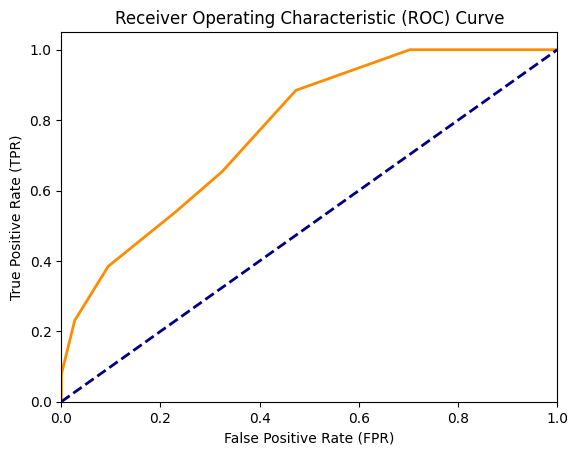

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities for class 1 (y_pred_probs)
fpr_values = []
tpr_values = []
thresholds = []

# Create a list of threshold values to consider (between 0 and 1)
threshold_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate TPR and FPR for each threshold
for threshold in threshold_values:
    # Apply the threshold to predicted probabilities to get binary predictions
    y_pred_binary = [1 if prob >= threshold else 0 for prob in probabilities]

    # Calculate TP, FP, TN, FN
    TP = sum(1 for true, pred in zip(Y_test_matrix, y_pred_binary) if true == 1 and pred == 1)
    FP = sum(1 for true, pred in zip(Y_test_matrix, y_pred_binary) if true == 0 and pred == 1)
    TN = sum(1 for true, pred in zip(Y_test_matrix, y_pred_binary) if true == 0 and pred == 0)
    FN = sum(1 for true, pred in zip(Y_test_matrix, y_pred_binary) if true == 1 and pred == 0)

    # Calculate TPR and FPR
    tpr = TP / (TP + FN) if TP + FN > 0 else 0
    fpr = FP / (FP + TN) if FP + TN > 0 else 0

    # Append to lists
    tpr_values.append(tpr)
    fpr_values.append(fpr)
    thresholds.append(threshold)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


Model Performance:

The ROC curve of your model should lie above the random classifier's diagonal line. The further it is from the diagonal, the better the model's performance.
Points closer to the top-left corner indicate better model performance. Models with ROC curves that hug the top-left corner have high TPR and low FPR across various thresholds.

Thresholds:

Each point on the ROC curve corresponds to a specific decision threshold for classifying data into the positive or negative class.
As you move along the ROC curve from left to right, you increase the threshold, leading to a decrease in FPR and TPR. This illustrates the trade-off between sensitivity and specificity.

# **_5. References_**

1.   List item
2.   List item

